# Real Estate -  Price Predictor

In [1]:
import pandas as pd
import numpy as np


In [2]:
housing=pd.read_csv("HousingData.csv")
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

In [4]:
# For information
# To check if it's contain any null or not

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# To check values count

housing['CHAS'].value_counts()

# It means 0---471 times h
# Nd       1---35  times h

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
# If we want to describe our data
# Here 25% is 25 percentile like CF(cumulative frequency)
# Count---- no of values(NaN not include)
# Mean
# STD - How much values are far from mean

housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Now creating a histogram for each column
# To check the nature of values for each feature


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#housing.hist(bins=20,figsize=(20,15))

# Train _ Test Split By different methods

In [10]:
# First we done it manually

# For learning purpose
'''
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))# Index shuffled 
    print(shuffled) #---- always give random value so we use random seed so that our model dont see test data
    test_set_size= int(len(data)*test_ratio)
    test_indicies= shuffled[:test_set_size]
    train_indicies= shuffled[test_set_size:]
    
    return data.iloc[train_indicies], data.iloc[test_indicies]

train_set, test_set= split_train_test(housing, .2)
print(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")

'''    

'\ndef split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled= np.random.permutation(len(data))# Index shuffled \n    print(shuffled) #---- always give random value so we use random seed so that our model dont see test data\n    test_set_size= int(len(data)*test_ratio)\n    test_indicies= shuffled[:test_set_size]\n    train_indicies= shuffled[test_set_size:]\n    \n    return data.iloc[train_indicies], data.iloc[test_indicies]\n\ntrain_set, test_set= split_train_test(housing, .2)\nprint(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")\n\n'

**Now we done it by sklit method**




In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)

print(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")

Rows in train set 404
Rows in test_set 102


**Suppose you have one most important fetaure then you want to split that fetaure qually between train and test data**



In [12]:
# For Now we are considering CHSA is important for predicting the price
# For this we use Stratified splitting

'''
Exp : CHSA have 471 zeros and only 35 one so in case you divide all zeros in train and all 1 in test so 
in this model will ne confused

Then we divide the CHAS data equally
'''


'\nExp : CHSA have 471 zeros and only 35 one so in case you divide all zeros in train and all 1 in test so \nin this model will ne confused\n\nThen we divide the CHAS data equally\n'

In [13]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split= StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


In [16]:
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]




In [17]:
#strat_train_set

strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
#strat_test_set

strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
housing=strat_train_set

In [21]:
housing.shape

(404, 14)

In [22]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# Looking for correlations

In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

# How data is depend on each other(for now on MEDV)
#Like RM is .69 so it's strong positive correlation
# And LSTAT -.73 so it's strong negative correlation


MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

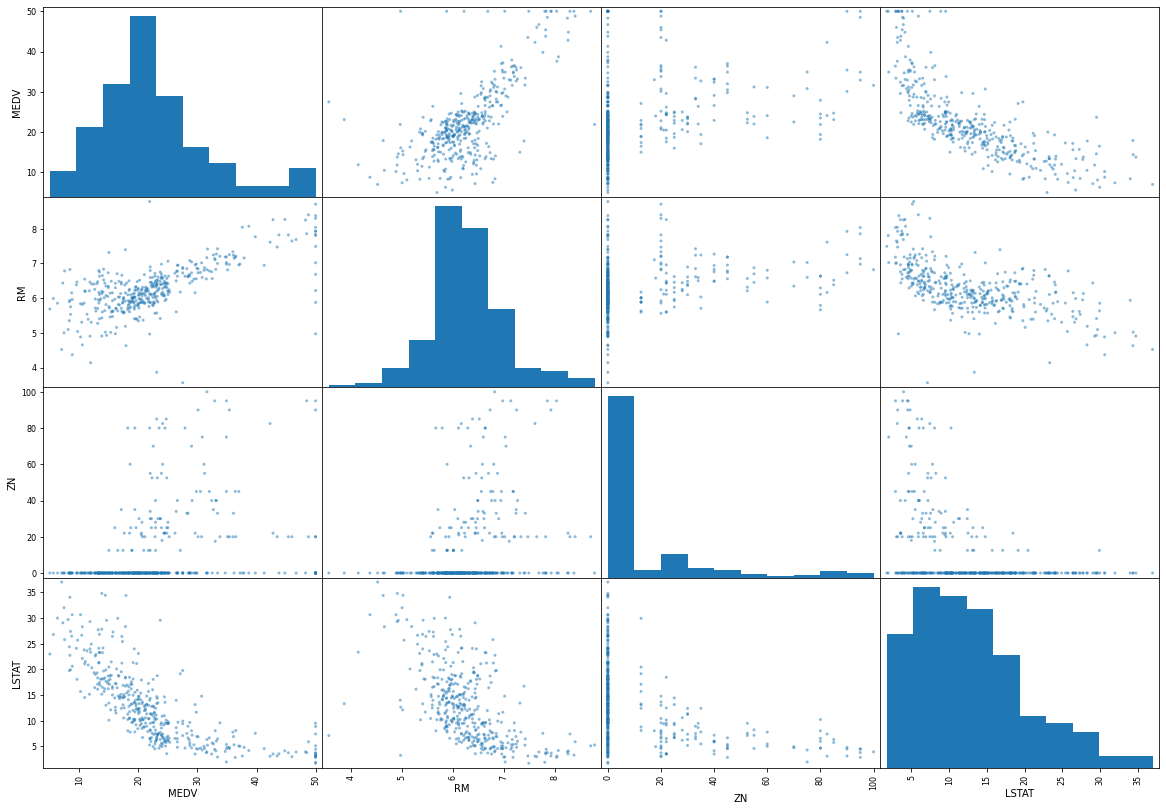

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(20,14))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

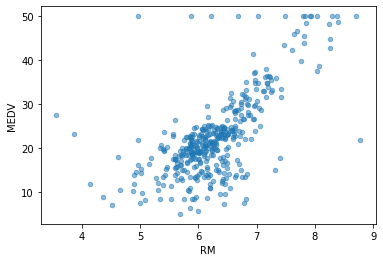

In [25]:
# To see differntly if you are intresting in any specific attribute
# Now we can remove these outliers



housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

# Trying out Attribute Combinations

In [26]:
# It's mean we can creat other attribute in data as per our searching on the data
# like now we are creating a another attribute name with 'TaxPerRoom' as per below:


In [27]:
housing['TaxPerRoom']= housing['TAX']/housing['RM']
strat_test_set['TaxPerRoom']= strat_test_set['TAX']/strat_test_set['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxPerRoom
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV          1.000000
RM            0.680857
B             0.361761
ZN            0.339741
DIS           0.240451
CHAS          0.205066
AGE          -0.364596
RAD          -0.374693
CRIM         -0.393715
NOX          -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
TaxPerRoom   -0.528626
LSTAT        -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TaxPerRoom', ylabel='MEDV'>

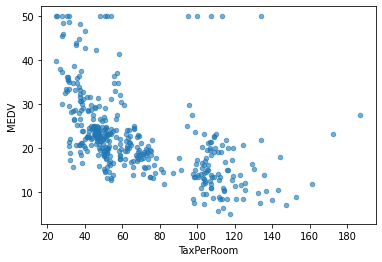

In [29]:
housing.plot(kind='scatter', x='TaxPerRoom', y='MEDV', alpha=0.6)

#Alpha---- for dark/light color

In [30]:
# For Learning purpose now we are deleting some number from RM attribute

In [31]:
housing.info()

#RM is 400 here so it means there are some null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        404 non-null    float64
 1   ZN          404 non-null    float64
 2   INDUS       404 non-null    float64
 3   CHAS        404 non-null    int64  
 4   NOX         404 non-null    float64
 5   RM          399 non-null    float64
 6   AGE         404 non-null    float64
 7   DIS         404 non-null    float64
 8   RAD         404 non-null    int64  
 9   TAX         404 non-null    int64  
 10  PTRATIO     404 non-null    float64
 11  B           404 non-null    float64
 12  LSTAT       404 non-null    float64
 13  MEDV        404 non-null    float64
 14  TaxPerRoom  399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [32]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxPerRoom
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [33]:
housing= strat_train_set.drop('MEDV', axis=1)
housing_label= strat_train_set['MEDV']

In [34]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TaxPerRoom
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,102.068966


# Missing Attrbute

In [35]:
'''
To take care of missing attribute, you have 3 options: 
    1) Get rid of the missing datapoint
    2) Get rid of the whole attribute
    3) Set the value to 0 or mean or median
    
    
1) To remove those rows

2) If correlation is too low then we can remove

3) as attribute is important so we will set the value to some values(mean or median or zero)
'''

'\nTo take care of missing attribute, you have 3 options: \n    1) Get rid of the missing datapoint\n    2) Get rid of the whole attribute\n    3) Set the value to 0 or mean or median\n    \n    \n1) To remove those rows\n\n2) If correlation is too low then we can remove\n\n3) as attribute is important so we will set the value to some values(mean or median or zero)\n'

In [36]:
#Option 1: na row removed

a=housing.dropna()
print(housing.shape,a.shape)

(404, 14) (399, 14)


In [37]:
# Option2 -- to delete the attribute

housing.drop('RM', axis=1).shape

# Not save bcoz it's only for runtime

(404, 13)

In [38]:
# Option 3------ To set value : Now we are setting the median

#To compute Median

median= housing['RM'].median()
median


# To set median in nan

housing['RM'].fillna(median).shape


(404,)

In [39]:
# In case test data me bhi miss ho rm to iske lie imputer class h


In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [41]:
# Median of all attributes
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.48312199e+01])

In [42]:
x= imputer.transform(housing)

In [43]:
housing_tr= pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TaxPerRoom
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.536786
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.412918
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Feature Scaling

ML algos will work better if numerical data with in same scale

like - RM hmara 8 tk jara h max but MEDV jara h 50 tk so our task is to scale these in a same format


**Primarily, two type of feature scaling method:**

1) Min-Max Scaling (Normalization)
(value-min)/(max-min)
for this sklearn provides MinMaxScaler class


2) Standardization:
(Value-mean)/sd
for this sklearn provide standard scaller for this




# Scikit-Learn Design



Premarily, three types of object:
    1) Estimators
    2) Transformers
    3) Predictors
    

1) **Estimators**:-  It estimate some parameter based on a Dataset (like - Imputer).
                 It has the fit method and transform method.
                 Fits method- Fits the data and calculate internal parameter
    
2) **Transformers**: Transformers method take inputs and return output based on the learning from fit().
                 Here we also have fit_transform() method it will be optimize rather than fit and transform

    
3) **Predictor** :-  Linear Regression 
                 Two common function ------ Fit() and predict()


In [65]:
housing.shape

(404, 14)

# Pipeline 

Series of steps.
Code so that you can change your model in future easily



In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    
    #('std_scaler', StandardScaler())
    # And many more.................
])


In [46]:
housing.shape

(404, 14)

In [47]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
#Now it becomes a numpy array for better speed and scaling

housing_num_tr

array([[4.81900000e-02, 8.00000000e+01, 3.64000000e+00, ...,
        3.92890000e+02, 6.57000000e+00, 5.15717092e+01],
       [1.50100000e-02, 8.00000000e+01, 2.01000000e+00, ...,
        3.90940000e+02, 5.99000000e+00, 4.22004521e+01],
       [4.87141000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        3.96210000e+02, 1.86800000e+01, 1.02714374e+02],
       ...,
       [8.18700000e-02, 0.00000000e+00, 2.89000000e+00, ...,
        3.93530000e+02, 3.57000000e+00, 3.52941176e+01],
       [4.75237000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        5.09200000e+01, 1.81300000e+01, 1.02068966e+02],
       [4.56000000e-02, 0.00000000e+00, 1.38900000e+01, ...,
        3.92800000e+02, 1.35100000e+01, 4.68750000e+01]])

In [49]:
housing_num_tr.shape

(404, 14)

# Select and train the Model for our company

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [51]:
#model=LinearRegression()
#model = DecisionTreeRegressor()#-----It's showing overfitting so it fails
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [52]:
some_data= housing_num_tr[:5]
some_label= housing_label[:5]

prepaerd_data= my_pipeline.transform(some_data)

In [53]:
model.predict(prepaerd_data)

array([22.457, 25.343, 16.196, 23.449, 23.356])

In [54]:
print(list(some_label))

[21.9, 24.5, 16.7, 23.1, 23.0]


# Evaluating the model

In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions= model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_predictions)
rmse=np.sqrt(mse)
print(rmse)

1.198402761269274


# Using better evaluation technique - Cross Validation Technique

**Cross Validation Technique**-Like we have data as below
1 2 3 4 5 6 7 8 9 10

so we first train model on 2 to 10 and test on 1, then next step we train on 1,3 to 10 and test on 2. same for many steps

In [56]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, housing_num_tr, housing_label, scoring= "neg_mean_squared_error", cv=10, )
#CV=10 means we want to give 10 fold to data

rmse_scores= np.sqrt(-score)

In [57]:
print(rmse_scores)

[2.91670424 2.86952217 4.35957061 2.53621549 3.48480912 2.57212315
 4.29732339 3.29943693 2.94137959 3.09737823]


In [58]:
def print_score(rmse_scores):
    print("Score: ", rmse_scores)
    print("Mean: ", rmse_scores.mean())
    print('Std Dev : ', rmse_scores.std())

In [59]:
print_score(rmse_scores)

Score:  [2.91670424 2.86952217 4.35957061 2.53621549 3.48480912 2.57212315
 4.29732339 3.29943693 2.94137959 3.09737823]
Mean:  3.2374462939648994
Std Dev :  0.6105269330750335


# we finally choosed the Random Forest 

Bases on model output text file best answer

In [60]:
from joblib import dump, load

dump(model, 'PricePrediction.joblib')

#Model has been created and saved!!

['PricePrediction.joblib']

# Testing Our Model on test data

In [61]:
x_test= strat_test_set.drop('MEDV', axis=1)
x_test.shape

(102, 14)

In [62]:
x_test= strat_test_set.drop('MEDV', axis=1)
y_test= strat_test_set["MEDV"]

x_test_prepared= my_pipeline.fit_transform(x_test)

final_predictions= model.predict(x_test_prepared)

final_mse= mean_squared_error(y_test, final_predictions)

final_rmse= np.sqrt(final_mse)

print(final_rmse)

2.9556908866874183


In [63]:
print(list(final_predictions))

[24.306000000000008, 11.159999999999998, 25.60099999999999, 22.677999999999997, 19.517999999999986, 15.155999999999997, 20.757, 14.651999999999985, 31.34099999999999, 42.789000000000016, 19.323, 11.645999999999992, 25.291000000000004, 27.999999999999986, 20.012000000000004, 10.914999999999997, 31.229999999999983, 14.558000000000002, 23.94599999999998, 18.852999999999998, 19.62899999999998, 17.323000000000008, 18.253999999999994, 22.157999999999998, 18.733999999999998, 32.103, 15.781, 32.934, 8.661000000000003, 32.755999999999986, 24.360999999999994, 21.075000000000003, 23.11699999999999, 10.27099999999999, 21.44099999999999, 10.963999999999999, 43.07600000000002, 24.74900000000001, 23.35000000000001, 42.54200000000001, 23.892000000000003, 30.864, 20.404000000000014, 20.925000000000004, 18.243, 32.92099999999999, 44.179000000000016, 20.453999999999994, 20.27399999999999, 21.831999999999994, 20.735999999999994, 14.510999999999992, 21.75900000000001, 14.930999999999985, 25.31200000000001,

In [64]:
print(list(y_test))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]
